# GWP 1 Python Script for downlading and analyzing the data

Group members are-


*   Christopher Enny Ofikwu, Nigeria, c.ofikwu@outlook.com
*   Bharat Swami, India, bharatswami1299@gmail.com
*   Chengjie Wang, China, cjay-wang@hotmail.com







**STEP 3: Student A is the macroeconomic / geopolitical specialist**

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


Ticker      Crude Oil (WTI)  US Dollar Index  Energy Sector ETF  \
Date                                                              
2010-01-04        81.510002        77.529999          35.645325   
2010-01-05        81.769997        77.620003          35.936245   
2010-01-06        83.180000        77.489998          36.366589   
2010-01-07        82.660004        77.910004          36.312031   
2010-01-08        82.750000        77.470001          36.548416   

Ticker      S&P 500 Index  10Y Treasury Yield  
Date                                           
2010-01-04    1132.989990               3.841  
2010-01-05    1136.520020               3.755  
2010-01-06    1137.140015               3.808  
2010-01-07    1141.689941               3.822  
2010-01-08    1144.979980               3.808

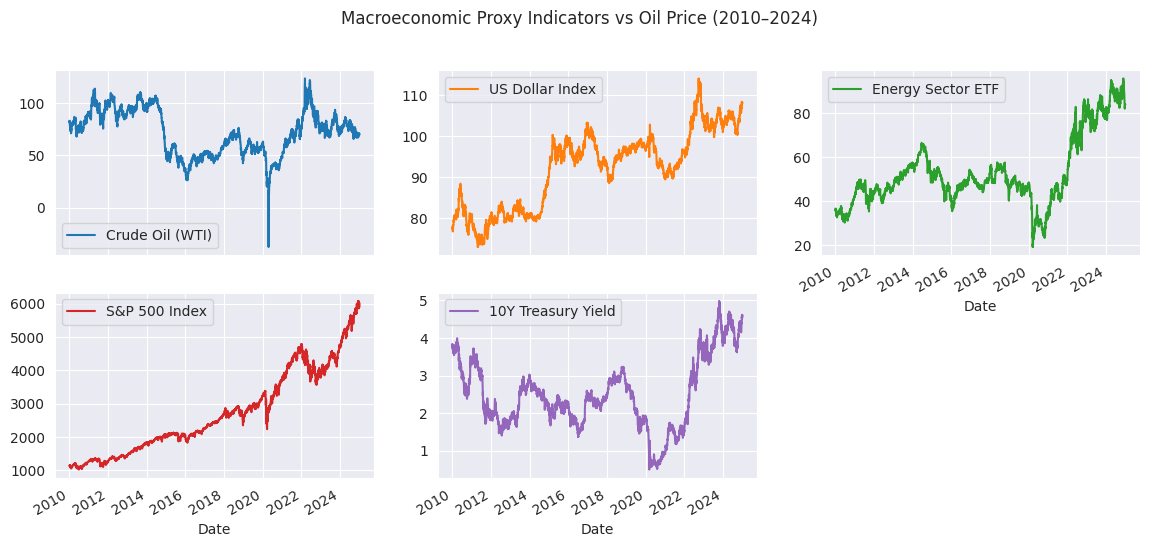

In [ ]:
# Install required libraries (skip if already installed)
# !pip install yfinance --quiet

# Import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better aesthetics
sns.set_style('darkgrid')

# Set default figure size
plt.rcParams['figure.figsize'] = (14, 6)

# Download data (Crude Oil + macroeconomic proxy indicators)
symbols = {
    'CL=F': 'Crude Oil (WTI)',
    '^GSPC': 'S&P 500 Index',
    'DX-Y.NYB': 'US Dollar Index',
    '^TNX': '10Y Treasury Yield',
    'XLE': 'Energy Sector ETF'
}

# Fetch historical closing prices from Yahoo Finance (daily frequency)
data = yf.download(list(symbols.keys()),
                   start='2010-01-01',
                   end='2024-12-31')['Close']
data.rename(columns=symbols, inplace=True)

# Drop NaN
data.dropna(inplace=True)

# Display
display(data.head())

# Plot each series as a separate subplot
data.plot(subplots=True, layout=[2, 3],
          title="Macroeconomic Proxy Indicators vs Oil Price (2010–2024)");


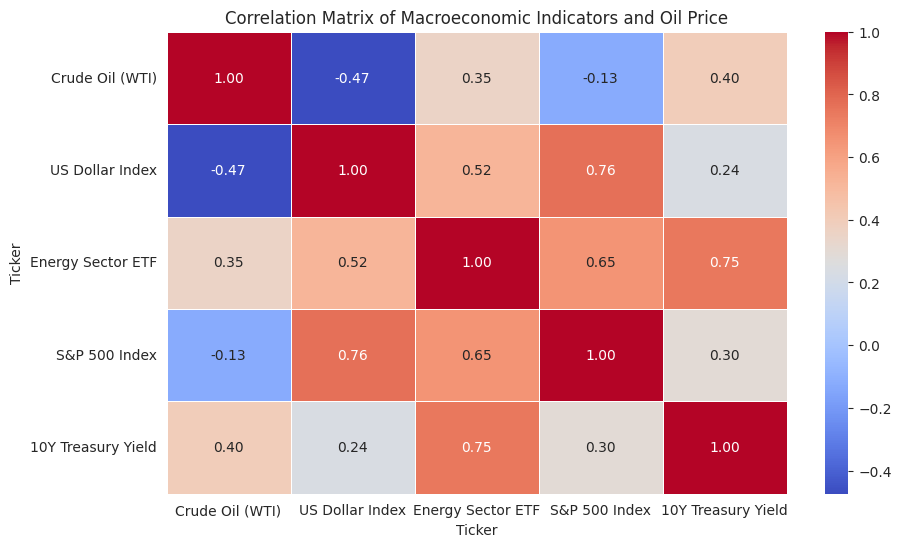

In [ ]:
# Corr matrix
correlation_matrix = data.corr()

# Plot the heatmap for corr
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Macroeconomic Indicators and Oil Price")
plt.show()

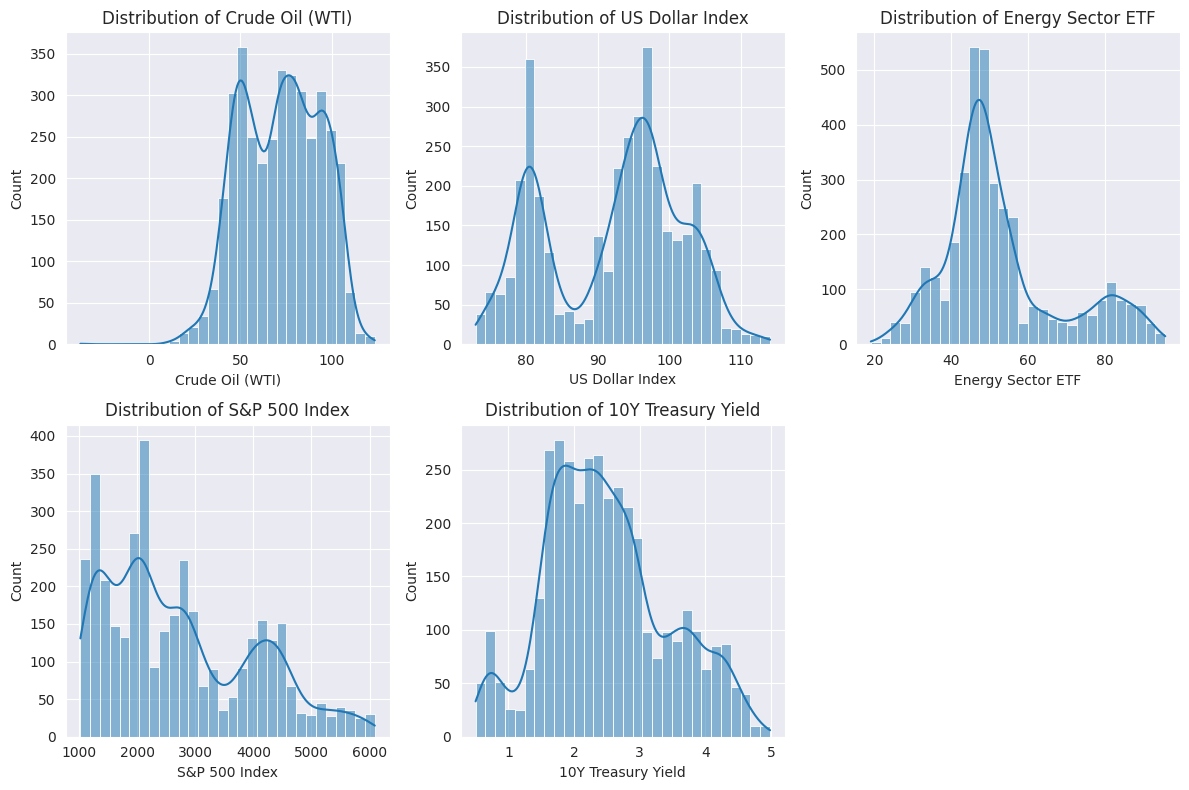

In [ ]:
# Distributional Plots
plt.figure(figsize=(12, 8))

# Plotting the distribution for each key variable
for i, col in enumerate(data.columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

**STEP 5: Student A Extrme Outliers**


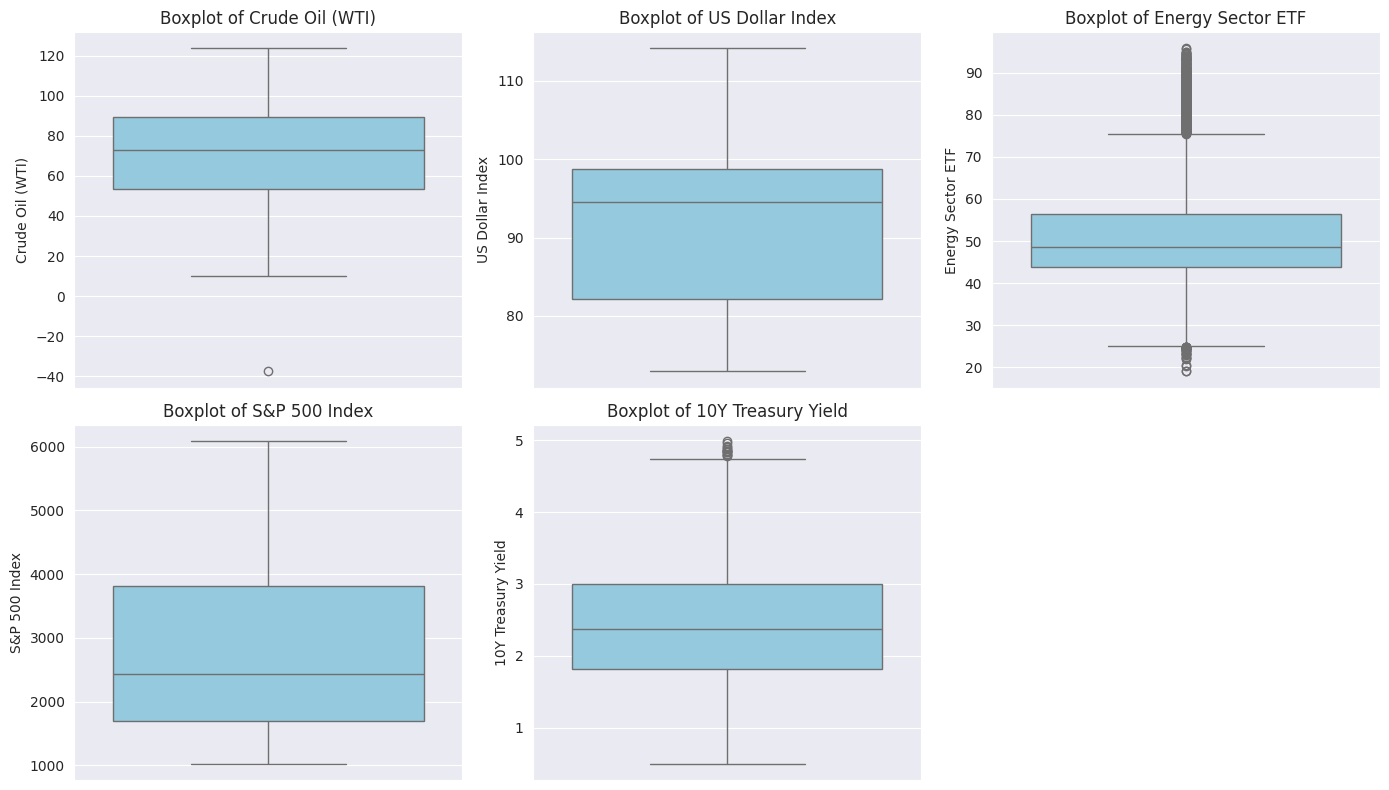

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

plt.figure(figsize=(14, 8))

# Boxplot to check outliers
for i, col in enumerate(data.columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data[col], color='skyblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate z-scores for each column
z_scores = np.abs(stats.zscore(data))

# Identify rows with z-scores greater than 3 (outliers)
outliers = (z_scores > 3)

# Display the rows with outliers
outlier_data = data[outliers.any(axis=1)]
print("Outliers detected (using z-score):")
print(outlier_data)


Outliers detected (using z-score):
Ticker      Crude Oil (WTI)  US Dollar Index  Energy Sector ETF  \
Date                                                              
2020-04-20       -37.630001        99.959999          26.760809   

Ticker      S&P 500 Index  10Y Treasury Yield  
Date                                           
2020-04-20    2823.159912               0.626  


In [ ]:
# Copy for cleaning
data_filled = data.copy()

# Loop through each ticker
for col in ['Energy Sector ETF']:  #data.columns:
    # mean and std
    mean = data[col].mean()
    std_dev = data[col].std()

    # Define the upper and lower bounds based on 3 standard deviations
    lower_bound = mean - 3 * std_dev
    upper_bound = mean + 3 * std_dev

    # Identify outliers
    outliers = (data_filled[col] < lower_bound) | (data_filled[col] > upper_bound)

    mean2 = data.loc[~outliers,col].mean()
    std_dev2 = data.loc[~outliers,col].std()

    lower_bound2 = mean2 - 3 * std_dev2
    upper_bound2 = mean2 + 3 * std_dev2

    # Replace outliers with 3 times the standard deviation
    data_filled[col] = np.where(outliers, np.clip(data_filled[col], lower_bound2, upper_bound2), data_filled[col])

**STEP 3: Student C is the financial specialist**

[*********************100%***********************]  5 of 5 completed


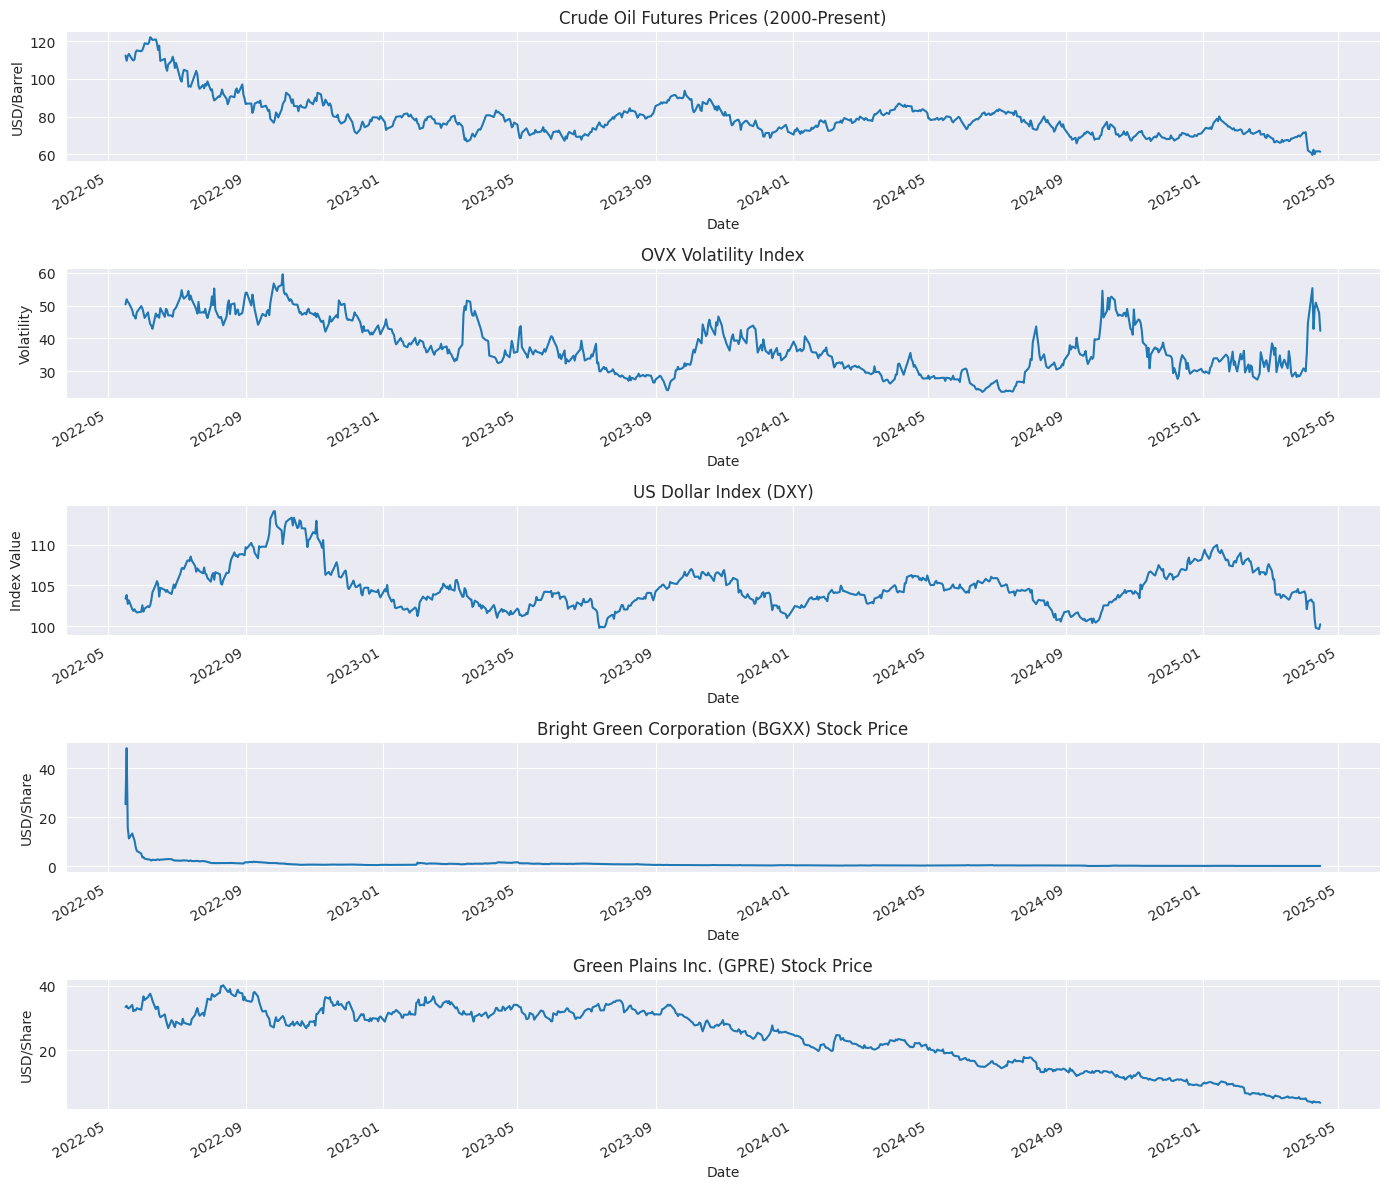

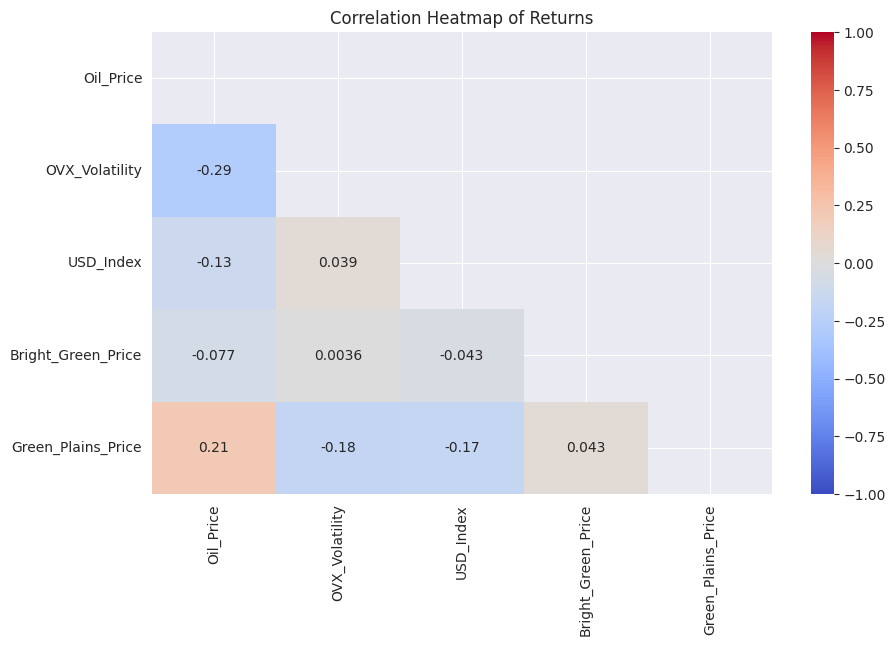


Data Dictionary:
| Variable          | Description                                  | Source        | Frequency   | Start_Date   | End_Date   | Ticker   |
|:------------------|:---------------------------------------------|:--------------|:------------|:-------------|:-----------|:---------|
| Crude_Oil_Futures | Front-month Crude Oil Futures Contract (WTI) | Yahoo Finance | Daily       | 2000-01-01   | 2025-04-16 | CL=F     |
| OVX_Volatility    | CBOE Crude Oil Volatility Index              | Yahoo Finance | Daily       | 2000-01-01   | 2025-04-16 | ^OVX     |
| USD_Exchange_Rate | US Dollar Index (DXY) measuring USD strength | Yahoo Finance | Daily       | 2000-01-01   | 2025-04-16 | DX-Y.NYB |
| Bright_Green      | Bright Green Corporation stock price         | Yahoo Finance | Daily       | 2000-01-01   | 2025-04-16 | BGXX     |
| Green_Plains      | Green Plains Inc. stock price                | Yahoo Finance | Daily       | 2000-01-01   | 2025-04-16 | GPRE     |


In [ ]:
# LIBRARIES
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

# TICKERS
tickers = {
    'Crude_Oil_Futures': 'CL=F',
    'OVX_Volatility': '^OVX',
    'USD_Exchange_Rate': 'DX-Y.NYB',
    'Bright_Green': 'BGXX',
    'Green_Plains': 'GPRE'
}
start_date = '2000-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

# DATA
data = yf.download(
    list(tickers.values()),
    start=start_date,
    end=end_date,
    group_by='ticker',
    interval='1d'
)

# CLOSE PRICES
oil_prices = data[tickers['Crude_Oil_Futures']]['Close'].rename('Oil_Price')
ovx = data[tickers['OVX_Volatility']]['Close'].rename('OVX_Volatility')
usd_dxy = data[tickers['USD_Exchange_Rate']]['Close'].rename('USD_Index')
bright_green = data[tickers['Bright_Green']]['Close'].rename('Bright_Green_Price')
green_plains = data[tickers['Green_Plains']]['Close'].rename('Green_Plains_Price')

# MERGE DATAFRAME
df = pd.concat([oil_prices, ovx, usd_dxy, bright_green, green_plains], axis=1).dropna()

# SAVE TO CSV/EXCEL
df.to_csv('oil_financial_data.csv')
df.to_excel('oil_financial_data.xlsx')

# RETURNS & VOLATILITY DETERMINATION
df_returns = df.pct_change().dropna()
df_volatility = df_returns.rolling(window=21).std() * np.sqrt(252)  # Annualized

# PLOTS
plt.figure(figsize=(14, 12))

# TIME SERIES
plt.subplot(5, 1, 1)
df['Oil_Price'].plot(title='Crude Oil Futures Prices (2000-Present)')
plt.ylabel('USD/Barrel')

plt.subplot(5, 1, 2)
df['OVX_Volatility'].plot(title='OVX Volatility Index')
plt.ylabel('Volatility')

plt.subplot(5, 1, 3)
df['USD_Index'].plot(title='US Dollar Index (DXY)')
plt.ylabel('Index Value')

plt.subplot(5, 1, 4)
df['Bright_Green_Price'].plot(title='Bright Green Corporation (BGXX) Stock Price')
plt.ylabel('USD/Share')

plt.subplot(5, 1, 5)
df['Green_Plains_Price'].plot(title='Green Plains Inc. (GPRE) Stock Price')
plt.ylabel('USD/Share')

plt.tight_layout()
plt.savefig('time_series_plots.png')
plt.show()

# HEATMAP CORRELATION
plt.figure(figsize=(10, 6))
sns.heatmap(
    df_returns.corr(),
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    mask=np.triu(np.ones_like(df_returns.corr()))
)
plt.title('Correlation Heatmap of Returns')
plt.savefig('correlation_heatmap.png')
plt.show()

# DATA DICT. TABLE
data_dict = pd.DataFrame({
    'Variable': [
        'Crude_Oil_Futures',
        'OVX_Volatility',
        'USD_Exchange_Rate',
        'Bright_Green',
        'Green_Plains'
    ],
    'Description': [
        'Front-month Crude Oil Futures Contract (WTI)',
        'CBOE Crude Oil Volatility Index',
        'US Dollar Index (DXY) measuring USD strength',
        'Bright Green Corporation stock price',
        'Green Plains Inc. stock price'
    ],
    'Source': ['Yahoo Finance'] * 5,
    'Frequency': ['Daily'] * 5,
    'Start_Date': [start_date] * 5,
    'End_Date': [end_date] * 5,
    'Ticker': list(tickers.values())
})

print("\nData Dictionary:")
print(data_dict.to_markdown(index=False))

In [ ]:


# LOAD DATA
raw_data = pd.read_csv('oil_financial_data.csv', index_col=0, parse_dates=True)


# CLEANING OUTLIER
def clean_outliers(df):
    cleaned = df.copy()
    reasons_log = pd.DataFrame()

    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        mask = (df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR))

        # Log removed outliers
        log = pd.DataFrame({
            'date': df[mask].index,
            'variable': col,
            'reason': 'Outlier',
            'description': f'Values beyond 1.5×IQR ({Q1 - 1.5*IQR:.2f} to {Q3 + 1.5*IQR:.2f})'
        })
        reasons_log = pd.concat([reasons_log, log])

        cleaned.loc[mask, col] = np.nan

    return cleaned, reasons_log

# Bad Data Cleaning
def clean_bad_data(df):
    cleaned = df.copy()
    reasons_log = pd.DataFrame()

    # Remove days with zero prices (invalid data)
    mask = (df['Oil_Price'] <= 0) | (df['OVX_Volatility'] <= 0)

    log = pd.DataFrame({
        'date': df[mask].index,
        'variable': 'All',
        'reason': 'Invalid Values',
        'description': 'Zero/negative prices or volatility'
    })
    reasons_log = pd.concat([reasons_log, log])

    cleaned = cleaned[~mask]
    return cleaned, reasons_log

# Missing Value Imputation
def impute_missing(df):
    cleaned = df.copy()

    # Linear interpolation for missing values
    cleaned.interpolate(method='time', inplace=True)

    # Log remaining missing values (if any)
    mask = cleaned.isna().any(axis=1)
    log = pd.DataFrame({
        'date': cleaned[mask].index,
        'variable': 'All',
        'reason': 'Unfixable Missing',
        'description': 'Edge cases with insufficient data for imputation'
    })

    cleaned.dropna(inplace=True)  # Remove any remaining missing
    return cleaned, log


# Apply cleaning sequentially
stage1, log1 = clean_outliers(raw_data)
stage2, log2 = clean_bad_data(stage1)
sterilized_data, log3 = impute_missing(stage2)

# Combine all elimination logs
elimination_log = pd.concat([log1, log2, log3])
elimination_log.to_csv('data_elimination_log.csv')



# Save final dataset
sterilized_data.to_csv('sterilized_oil_data.csv')
sterilized_data.to_excel('sterilized_oil_data.xlsx')

# Generate summary table for eliminated data
elimination_summary = elimination_log.groupby(['reason', 'variable']).size().reset_index(name='count')
elimination_summary['Percentage'] = elimination_summary['count'] / len(raw_data) * 100

print("Data Elimination Summary:")
print(elimination_summary.to_markdown(index=False))



doc = """

""".format(
    outlier_count=len(log1),
    bad_data_count=len(log2),
    imputed_count=len(stage2) - len(sterilized_data),
    unfixable_count=len(log3)
)

with open('data_cleaning_report.md', 'w') as f:
    f.write(doc)

Data Elimination Summary:
| reason            | variable           |   count |   Percentage |
|:------------------|:-------------------|--------:|-------------:|
| Outlier           | Bright_Green_Price |      48 |      6.57534 |
| Outlier           | Oil_Price          |      39 |      5.34247 |
| Outlier           | USD_Index          |      25 |      3.42466 |
| Unfixable Missing | All                |      45 |      6.16438 |


**STEP 7**

Data loaded successfully:
             Oil_Price  OVX_Volatility   USD_Index  Bright_Green_Price  \
Date                                                                    
2022-07-22  94.699997       47.840000  106.730003                1.90   
2022-07-25  96.699997       47.959999  106.480003                1.84   
2022-07-26  94.980003       47.810001  107.190002                1.82   
2022-07-27  97.260002       48.990002  106.449997                1.80   
2022-07-28  96.419998       47.169998  106.349998                1.78   

            Green_Plains_Price  
Date                            
2022-07-22           30.719999  
2022-07-25           31.650000  
2022-07-26           30.660000  
2022-07-27           32.490002  
2022-07-28           34.060001  

Starting EDA Visualizations

Generating Distribution Plots...
Distribution plots saved


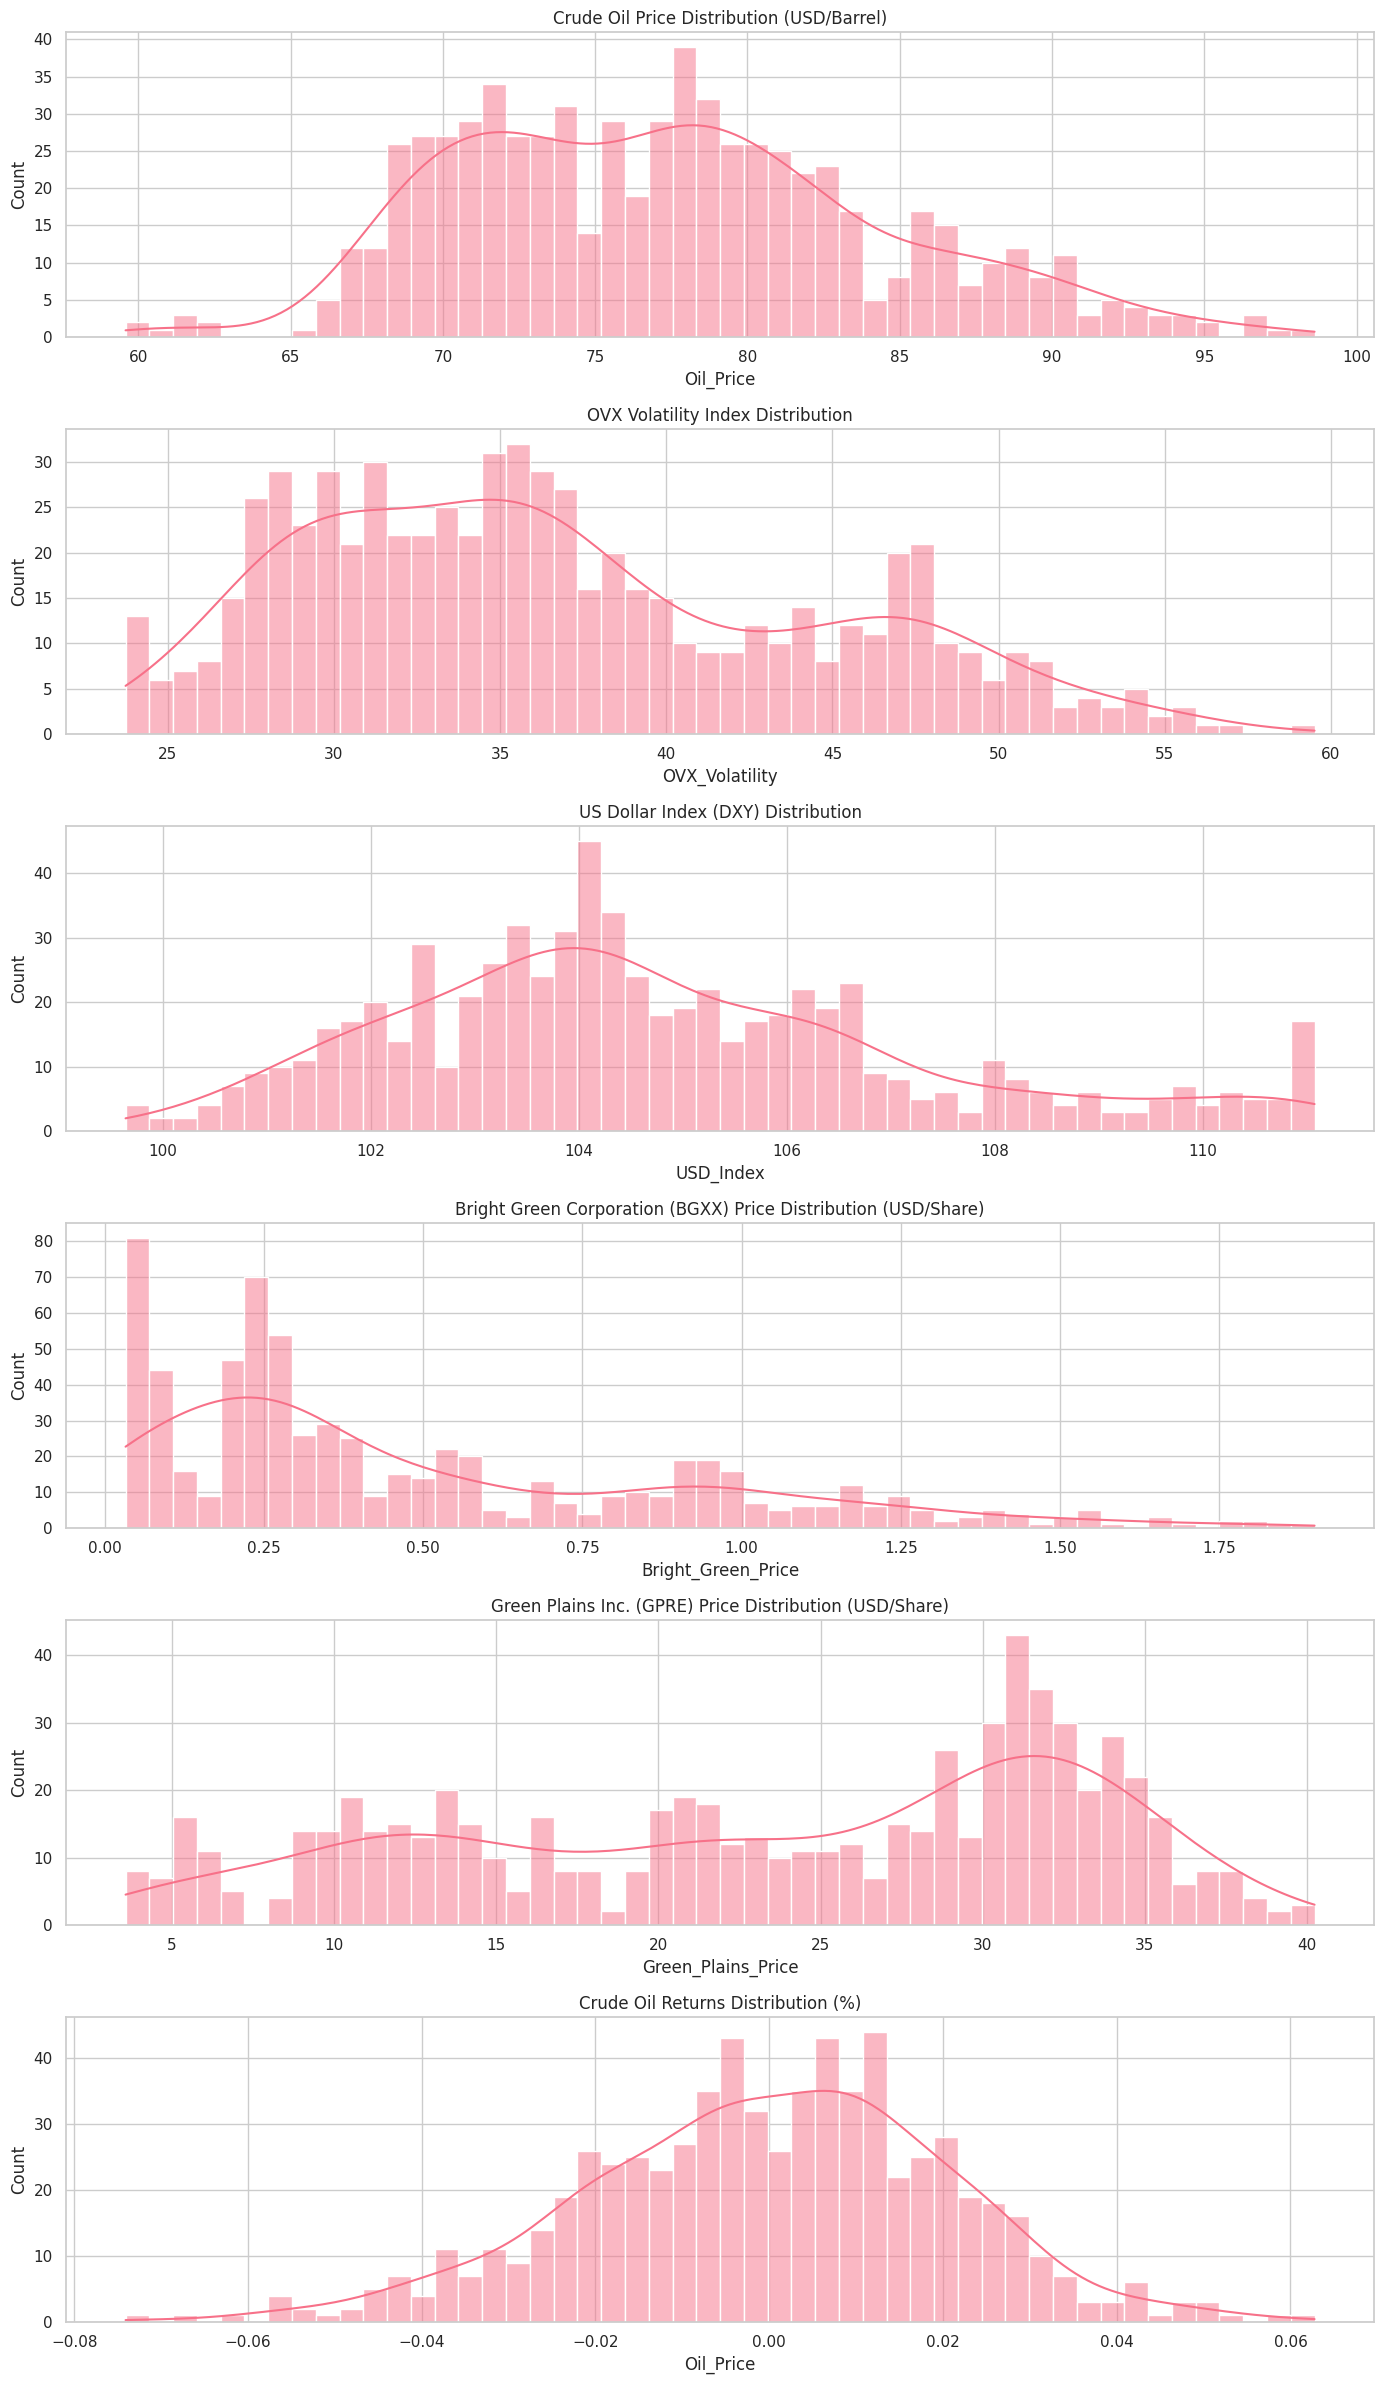


Generating Time Series Plots...
Time series plots saved


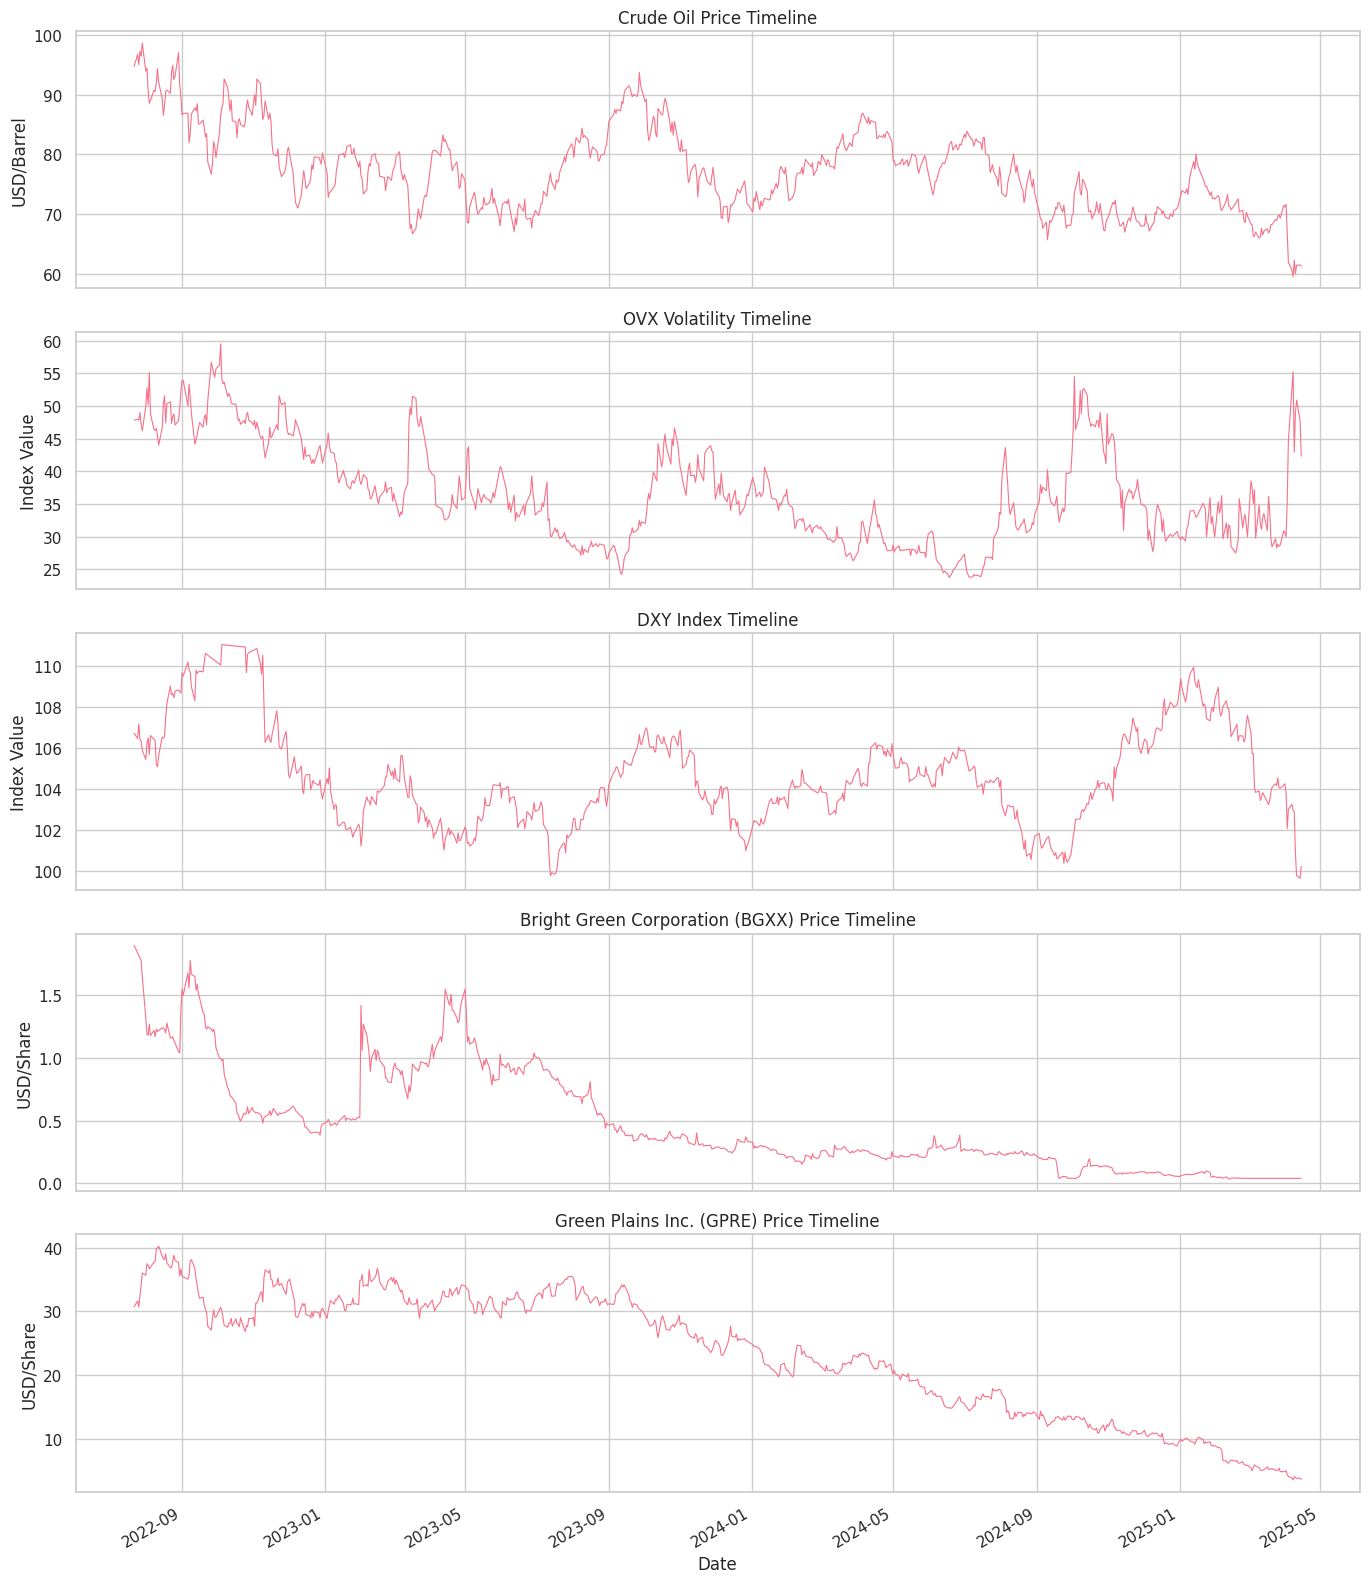


Generating Multivariate Analysis...
Correlation matrix saved


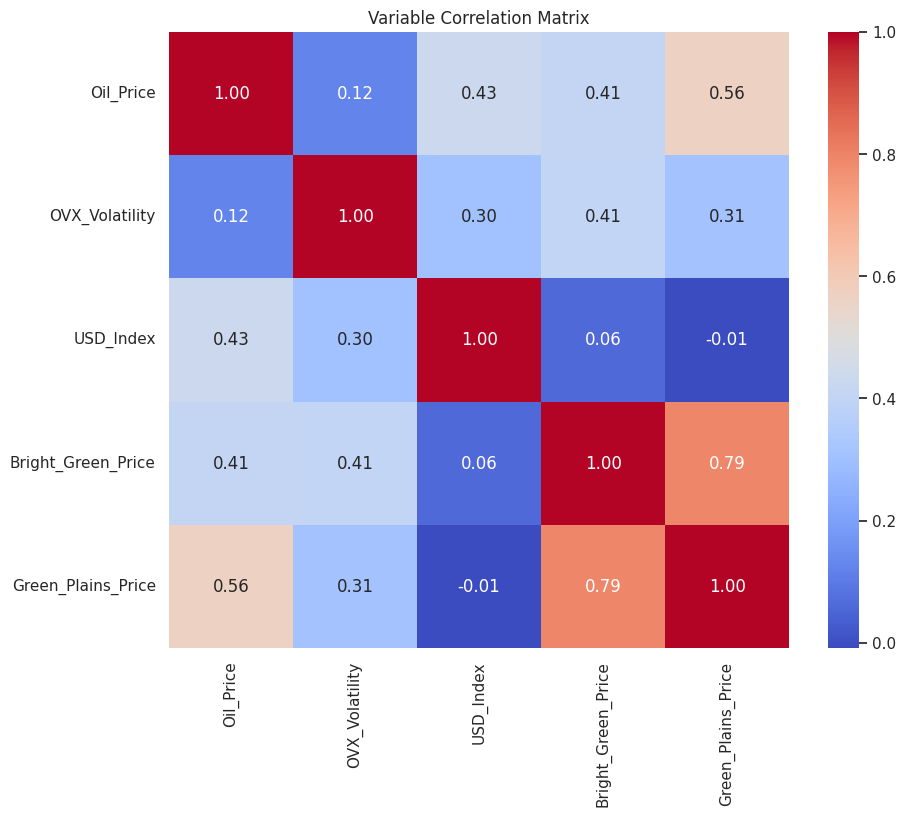

Rolling correlations saved


<Figure size 1400x600 with 0 Axes>

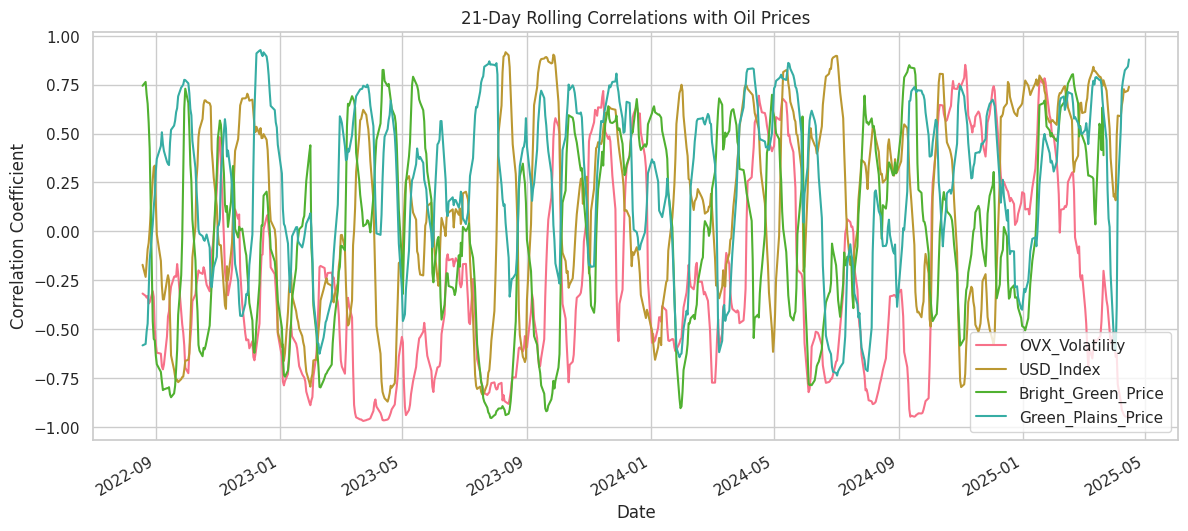


Generating Autocorrelation Plots...
Autocorrelation plots saved


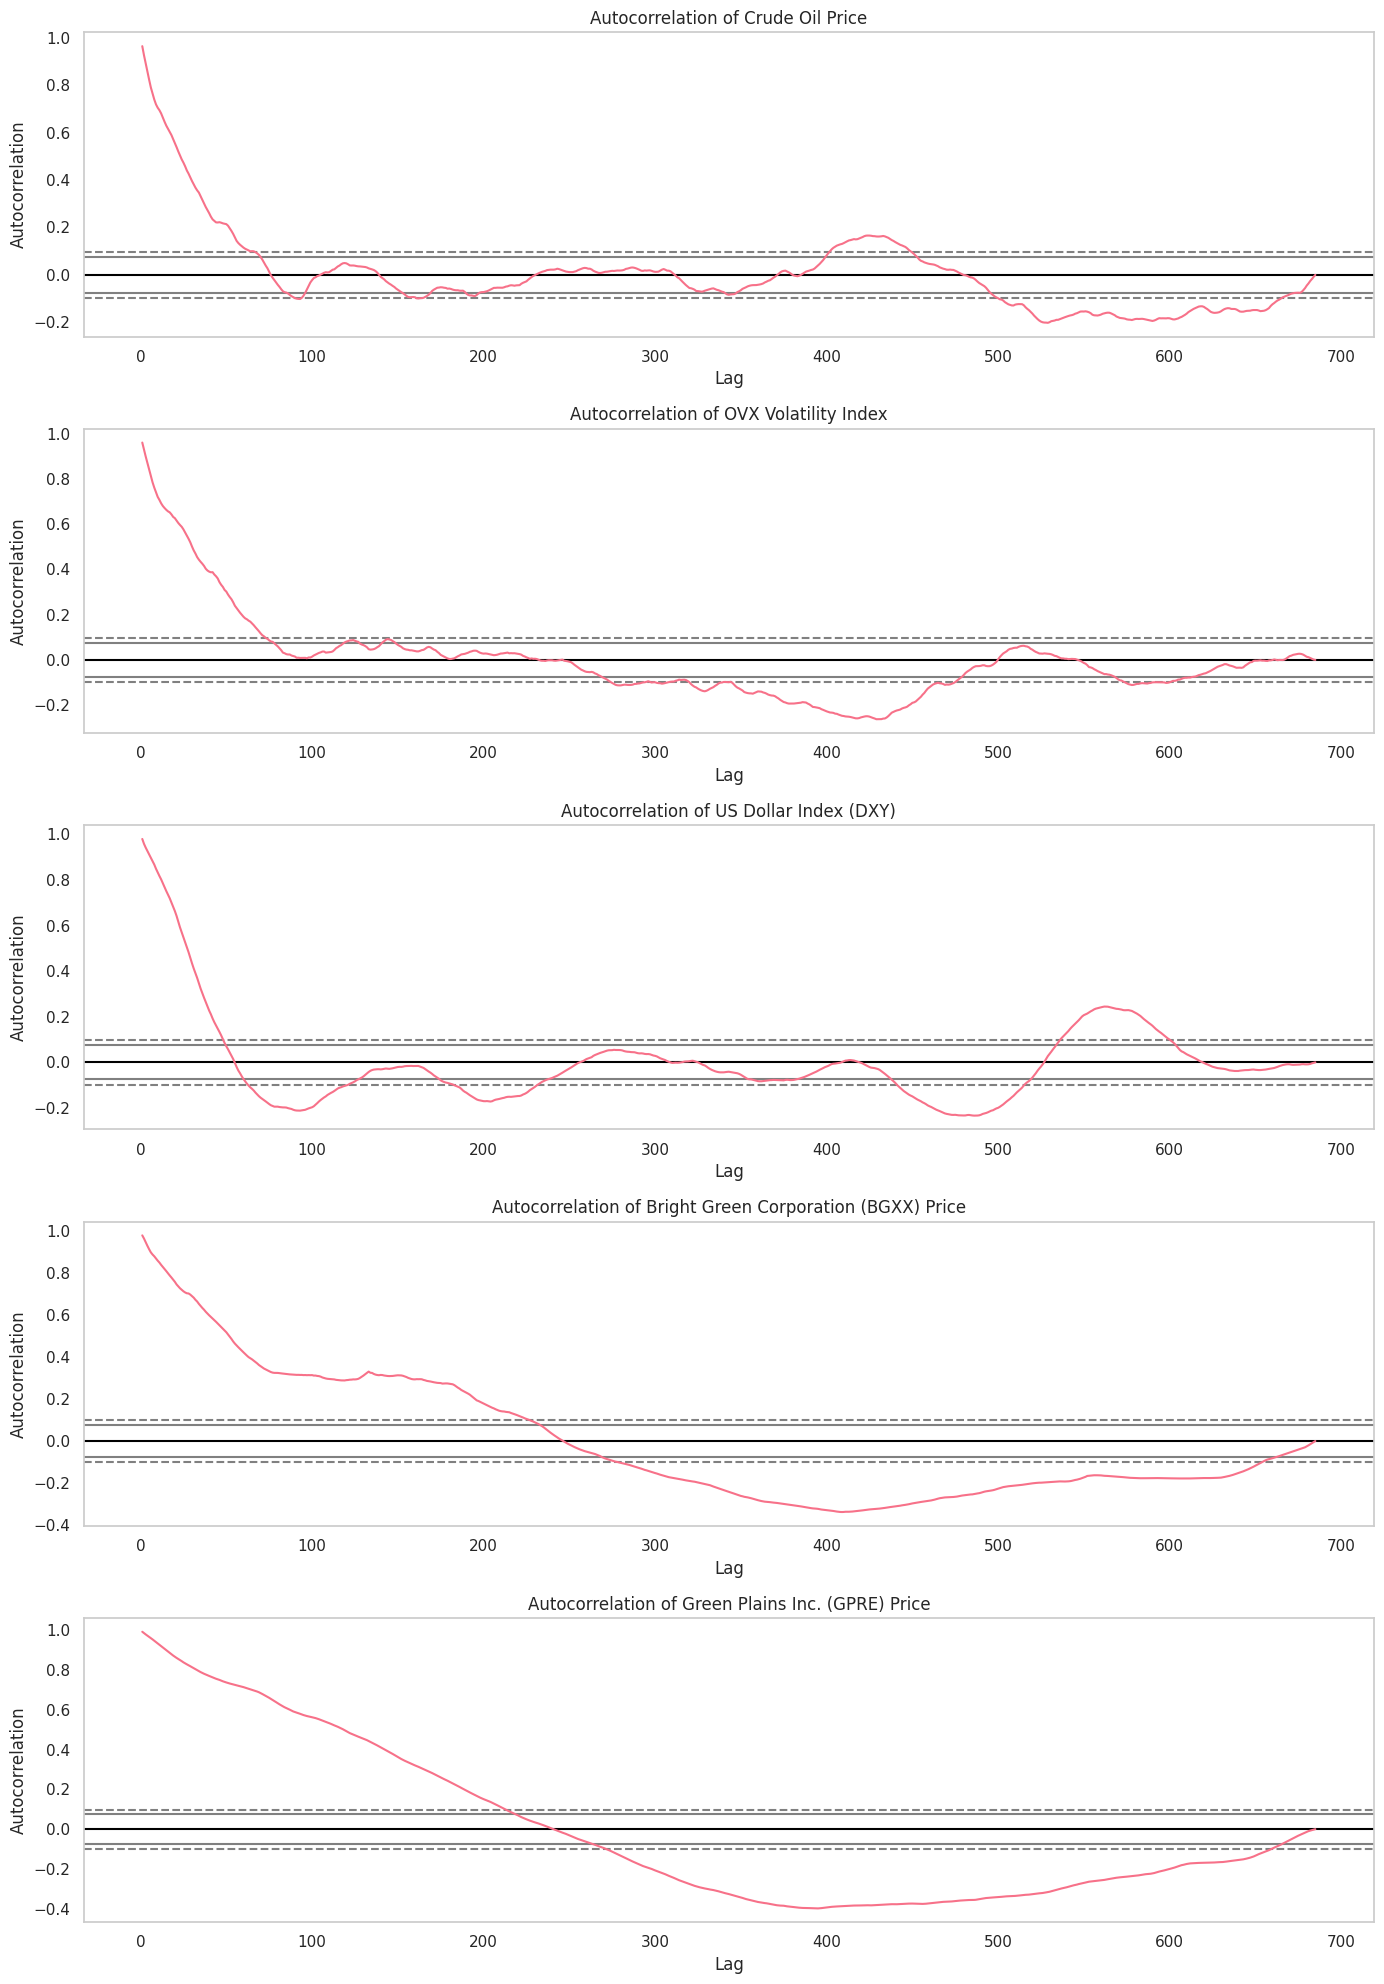


EDA Complete! Check saved PNG files


In [ ]:
# PLOTING CONFIGURATION
plt.ion()
%matplotlib inline

# LOAD STERILIZED DATA
try:
    data = pd.read_csv('sterilized_oil_data.csv', index_col=0, parse_dates=True)
    print("Data loaded successfully:\n", data.head())
except FileNotFoundError:
    raise FileNotFoundError("Sterilized data not found. Run Step 6 first!")

# SET PLOT PARAMETERS
plt.style.use('ggplot')
sns.set_theme(style="whitegrid", palette="husl")
print("\n" + "="*40 + "\nStarting EDA Visualizations\n" + "="*40)

# DISTRIBUTIONAL PLOTS
def plot_distributions(df):
    print("\nGenerating Distribution Plots...")
    fig, axes = plt.subplots(6, 1, figsize=(14, 24))

    # Oil Price Distribution
    sns.histplot(df['Oil_Price'], kde=True, ax=axes[0], bins=50)
    axes[0].set_title('Crude Oil Price Distribution (USD/Barrel)')

    # OVX Volatility Distribution
    sns.histplot(df['OVX_Volatility'], kde=True, ax=axes[1], bins=50)
    axes[1].set_title('OVX Volatility Index Distribution')

    # USD Index Distribution
    sns.histplot(df['USD_Index'], kde=True, ax=axes[2], bins=50)
    axes[2].set_title('US Dollar Index (DXY) Distribution')

    # Bright Green Price Distribution
    sns.histplot(df['Bright_Green_Price'], kde=True, ax=axes[3], bins=50)
    axes[3].set_title('Bright Green Corporation (BGXX) Price Distribution (USD/Share)')

    # Green Plains Price Distribution
    sns.histplot(df['Green_Plains_Price'], kde=True, ax=axes[4], bins=50)
    axes[4].set_title('Green Plains Inc. (GPRE) Price Distribution (USD/Share)')

    # Oil Returns Distribution
    oil_returns = df['Oil_Price'].pct_change().dropna()
    sns.histplot(oil_returns, kde=True, ax=axes[5], bins=50)
    axes[5].set_title('Crude Oil Returns Distribution (%)')

    plt.tight_layout()
    plt.savefig('distribution_plots.png', bbox_inches='tight')
    print("Distribution plots saved")
    plt.show()  # Display below code cell

plot_distributions(data)

# TIME SERIES
def plot_time_series(df):
    print("\nGenerating Time Series Plots...")
    fig, axes = plt.subplots(5, 1, figsize=(14, 16), sharex=True)

    df['Oil_Price'].plot(ax=axes[0], title='Crude Oil Price Timeline', lw=0.8)
    axes[0].set_ylabel('USD/Barrel')

    df['OVX_Volatility'].plot(ax=axes[1], title='OVX Volatility Timeline', lw=0.8)
    axes[1].set_ylabel('Index Value')

    df['USD_Index'].plot(ax=axes[2], title='DXY Index Timeline', lw=0.8)
    axes[2].set_ylabel('Index Value')

    df['Bright_Green_Price'].plot(ax=axes[3], title='Bright Green Corporation (BGXX) Price Timeline', lw=0.8)
    axes[3].set_ylabel('USD/Share')

    df['Green_Plains_Price'].plot(ax=axes[4], title='Green Plains Inc. (GPRE) Price Timeline', lw=0.8)
    axes[4].set_ylabel('USD/Share')

    plt.tight_layout()
    plt.savefig('time_series_plots.png', bbox_inches='tight')
    print("Time series plots saved")
    plt.show()  # Display below code cell

plot_time_series(data)

# MULTIVARIATE ANALYSIS
def plot_multivariate(df):
    print("\nGenerating Multivariate Analysis...")

    # Correlation Matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Variable Correlation Matrix')
    plt.savefig('correlation_matrix.png', bbox_inches='tight')
    print("Correlation matrix saved")
    plt.show()

    # Rolling Correlations
    plt.figure(figsize=(14, 6))
    df.rolling(21).corr().xs('Oil_Price', level=1)[['OVX_Volatility', 'USD_Index', 'Bright_Green_Price', 'Green_Plains_Price']].plot()
    plt.title('21-Day Rolling Correlations with Oil Prices')
    plt.ylabel('Correlation Coefficient')
    plt.savefig('rolling_correlations.png', bbox_inches='tight')
    print("Rolling correlations saved")
    plt.show()

plot_multivariate(data)

# AUTOCORRELATION ANALYSIS
def plot_autocorrelation(df):
    print("\nGenerating Autocorrelation Plots...")
    fig, axes = plt.subplots(5, 1, figsize=(14, 20))

    # Autocorrelation for Oil Price
    pd.plotting.autocorrelation_plot(df['Oil_Price'], ax=axes[0])
    axes[0].set_title('Autocorrelation of Crude Oil Price')

    # Autocorrelation for OVX Volatility
    pd.plotting.autocorrelation_plot(df['OVX_Volatility'], ax=axes[1])
    axes[1].set_title('Autocorrelation of OVX Volatility Index')

    # Autocorrelation for USD Index
    pd.plotting.autocorrelation_plot(df['USD_Index'], ax=axes[2])
    axes[2].set_title('Autocorrelation of US Dollar Index (DXY)')

    # Autocorrelation for Bright Green Price
    pd.plotting.autocorrelation_plot(df['Bright_Green_Price'], ax=axes[3])
    axes[3].set_title('Autocorrelation of Bright Green Corporation (BGXX) Price')

    # Autocorrelation for Green Plains Price
    pd.plotting.autocorrelation_plot(df['Green_Plains_Price'], ax=axes[4])
    axes[4].set_title('Autocorrelation of Green Plains Inc. (GPRE) Price')

    plt.tight_layout()
    plt.savefig('autocorrelation_plots.png', bbox_inches='tight')
    print("Autocorrelation plots saved")
    plt.show()

plot_autocorrelation(data)

print("\n" + "="*40 + "\nEDA Complete! Check saved PNG files\n" + "="*40)

### Microeconomic Data

In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import time
from tqdm import tqdm


In [2]:


# URL of the webpage
url = 'https://www.aranca.com/revenue-benchmarks/top-100-oil-&-gas-companies.php'

# Send a GET request to the webpage
response = requests.get(url)
response.raise_for_status()  # Check for request errors

# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table containing the data
table = soup.find('table')  # Adjust the selector based on the actual HTML structure

# Extract table headers
headers = [th.text.strip() for th in table.find_all('th')]

# Extract table rows
rows = []
for tr in table.find_all('tr')[1:]:  # Skip the header row
    cells = [td.text.strip() for td in tr.find_all('td')]
    # print(cells)
    if cells:
      for ele in cells:
        if ele == '':
          cells.remove(ele)
      for i in range(len(cells)):
        ele = cells[i]
        # cells[i] = ele.replace('\t', ' ').replace('\n', ' ').replace('\r', ' ')
        cells[i] = " ".join(ele.split())
      rows.append(cells)




In [3]:
len(rows[0]),len(rows[1]),len(rows[2]),len(rows[13])

(15, 10, 17, 17)

In [4]:
rows[0], rows[2]

(['Currency',
  'FQ',
  'Sales1',
  '3m',
  '6m',
  '9m',
  'ltm',
  '1y',
  '2y',
  '3y',
  '5y',
  '6m',
  'LTM',
  '3ycagr',
  '5ycagr'],
 ['Saudi Arabian Oil Co',
  'SAU',
  'SAR',
  '2023-12',
  '493.91',
  '-5.7%',
  '-13.9%',
  '-20.2%',
  '-18.1%',
  '-18.1%',
  '11.2%',
  '29.1%',
  '6.6%',
  '62',
  '75',
  '33',
  '65'])

Headers, correcting the header

In [9]:
headers = ['Company',
            'HQ',
            'Reported Currency',
            'Latest FQ',
            'LTM Sales (USD Biliion)',

            '3m year-on-year %',
           '6m year-on-year %',
           '9m year-on-year %',
           'ltm year-on-year %',
           '1y year-on-year %',

            '2y CAGR',
           '3y CAGR',
           '5y CAGR',

            '6m Growth Rank',
           'LTM Growth Rank',
           '3ycagr Growth Rank',
           '5ycagr Growth Rank',
        ]

Converting the dictionary data into dataframe

In [7]:
data = pd.DataFrame(rows[2:-2], columns=headers)

Data of top 100 companies in the oil and gas industry revenue wise

In [8]:
data.head()

Company   HQ Reported Currency Latest FQ  \
0             Saudi Arabian Oil Co  SAU               SAR   2023-12   
1  China Petroleum & Chemical Corp  CHN               HKD   2023-09   
2                PetroChina Co Ltd  CHN               CNY   2023-09   
3                 Exxon Mobil Corp  USA               USD   2023-12   
4                        Shell PLC  GBR               GBP   2023-12   

  LTM Sales (USD Biliion) 3m year-on-year % 6m year-on-year %  \
0                  493.91             -5.7%            -13.9%   
1                  470.54             -0.1%             -5.6%   
2                  434.82             -4.6%             -7.5%   
3                  334.70            -12.3%            -14.7%   
4                  316.96            -25.2%            -26.1%   

  9m year-on-year % ltm year-on-year % 1y year-on-year % 2y CAGR 3y CAGR  \
0            -20.2%             -18.1%            -18.1%   11.2%   29.1%   
1             -5.5%              -2.6%             10.4%   21.9%    4.0%   
2             -7.1%              -3.9%             23.9%   29.4%    8.8%   
3            -19.3%             -16.0%            -16.0%   10.0%   23.3%   
4            -26.5%             -18.6%            -20.1%   12.8%   23.0%   

  5y CAGR 6m Growth Rank LTM Growth Rank 3ycagr Growth Rank 5ycagr Growth Rank  
0    6.6%             62              75                 33                 65  
1    5.8%             28              32                 97                 71  
2    9.8%             35              36                 90                 48  
3    3.7%             67              66                 51                 85  
4   -4.0%             86              79                 53                 98

Companies list

In [10]:
Companies = data['Company'].tolist()
Companies

['Saudi Arabian Oil Co',
 'China Petroleum & Chemical Corp',
 'PetroChina Co Ltd',
 'Exxon Mobil Corp',
 'Shell PLC',
 'TotalEnergies SE',
 'BP PLC',
 'Chevron Corp',
 'Marathon Petroleum Corp',
 'Phillips 66',
 'Valero Energy Corp',
 'Equinor ASA',
 'Reliance Industries Ltd',
 'Petroleo Brasileiro SA Petrobras',
 'Eni SpA',
 'ENEOS Holdings Inc',
 'Indian Oil Corp Ltd',
 'Ptt PCL',
 'Orlen SA',
 'Repsol SA',
 'Energy Transfer LP',
 'Oil & Natural Gas Corp Ltd',
 'Idemitsu Kosan Co Ltd',
 'SK Innovation Co Ltd',
 'ConocoPhillips',
 'Bharat Petroleum Corp Ltd',
 'Hindustan Petroleum Corp Ltd',
 'Tokyo Electric Power Co Holdings',
 'Enterprise Products Partners LP',
 'Plains All American Pipeline LP',
 'Plains GP Holdings LP',
 'CNOOC Ltd',
 'World Kinect Corp',
 'OMV AG',
 'HD Hyundai',
 'Cenovus Energy Inc',
 'PBF Energy Inc',
 'Suncor Energy Inc',
 'Imperial Oil Ltd',
 'PJSC Lukoil',
 'Ecopetrol SA',
 'Schlumberger Ltd',
 'Enbridge Inc',
 'HF Sinclair Corp',
 'Canadian Natural Resourc

downloading the tickers for companies using yfinance api

In [14]:


def get_yahoo_ticker(company_name):
    query = company_name.replace(' ', '+')
    url = f'https://finance.yahoo.com/lookup?s={query}'
    headers = {'User-Agent': 'Mozilla/5.0'}

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    table_rows = soup.select('table tbody tr')
    if not table_rows:
        return {'company': company_name, 'ticker': None, 'exchange': None}

    first_row = table_rows[0]
    cells = first_row.find_all('td')

    if len(cells) >= 3:
        return {
            'company': company_name,
            'ticker': cells[0].text.strip(),
            'name': cells[1].text.strip(),
            'exchange': cells[2].text.strip()
        }
    return {'company': company_name, 'ticker': None, 'exchange': None}

# 🔄 Loop over your company list
companies = Companies
results = []
for company in companies:
    ticker_info = get_yahoo_ticker(company)
    if ticker_info['ticker'] is None:
      ticker_info = get_yahoo_ticker(company.split()[0])
    results.append(ticker_info)
    print(ticker_info)
    time.sleep(1)  # Be polite to Yahoo's servers


{'company': 'Saudi Arabian Oil Co', 'ticker': '2222.SR', 'name': 'Saudi Arabian Oil Co.', 'exchange': '25.45'}
{'company': 'China Petroleum & Chemical Corp', 'ticker': '600028.SS', 'name': 'CHINA PETROLEUM & CHEMICAL CORP', 'exchange': '5.73'}
{'company': 'PetroChina Co Ltd', 'ticker': 'PCCYF', 'name': 'PetroChina Co., Ltd.', 'exchange': '0.68'}
{'company': 'Exxon Mobil Corp', 'ticker': 'XOM', 'name': 'Exxon Mobil Corporation', 'exchange': '107.68'}
{'company': 'Shell PLC', 'ticker': 'SHEL', 'name': 'Shell PLC', 'exchange': '65.21'}
{'company': 'TotalEnergies SE', 'ticker': 'TTE', 'name': 'TotalEnergies SE', 'exchange': '58.99'}
{'company': 'BP PLC', 'ticker': 'BP', 'name': 'BP p.l.c.', 'exchange': '28.52'}
{'company': 'Chevron Corp', 'ticker': 'CVX', 'name': 'Chevron Corporation', 'exchange': '139.18'}
{'company': 'Marathon Petroleum Corp', 'ticker': 'MPC', 'name': 'Marathon Petroleum Corporation', 'exchange': '127.58'}
{'company': 'Phillips 66', 'ticker': 'PSX', 'name': 'Phillips 66'

All the companies tickers

In [65]:
_tickers = [ele['ticker'] for ele in results]
# _tickers

Downlaoading all the tickers from the SEC website

In [57]:
# url = f'https://www.sec.gov/Archives/edgar/data/1018724/000101872425000004/amzn-20241231.htm'
headers = {'User-Agent': "swamiverse0@address.com"}

companyTickers = requests.get(
    "https://www.sec.gov/files/company_tickers.json",
    headers=headers
    )

# review response / keys
# print(companyTickers.json().keys())

In [64]:
tickerData = []
for key, value in companyTickers.json().items():
  tickerData.append(value)
tickerData = pd.DataFrame(tickerData)
tickerData['cik_str'] = tickerData['cik_str'].astype(str).str.zfill(10)
tickerData.head(100)

cik_str ticker                            title
0   0000320193   AAPL                       Apple Inc.
1   0000789019   MSFT                   MICROSOFT CORP
2   0001045810   NVDA                      NVIDIA CORP
3   0001018724   AMZN                   AMAZON COM INC
4   0001652044  GOOGL                    Alphabet Inc.
..         ...    ...                              ...
95  0000060667    LOW              LOWES COMPANIES INC
96  0000078003    PFE                       PFIZER INC
97  0000879764    TTE                 TotalEnergies SE
98  0000875320   VRTX  VERTEX PHARMACEUTICALS INC / MA
99  0001121404    SNY                           Sanofi

[100 rows x 3 columns]

All the tickers avaliable in SEC database which we can downlaod

In [63]:
availableTickers = []

for ticker in _tickers:
  if ticker in tickerData['ticker'].tolist():
    availableTickers.append(ticker)

availableTickers_database = pd.DataFrame(availableTickers, columns=['ticker'])
availableTickers_database['company Name'] = availableTickers_database['ticker'].apply(lambda x: tickerData[tickerData['ticker'] == x]['title'].tolist()[0])
availableTickers_database.head(100)

ticker                                      company Name
0   PCCYF                                 PETROCHINA CO LTD
1     XOM                                  EXXON MOBIL CORP
2    SHEL                                         Shell plc
3     TTE                                  TotalEnergies SE
4      BP                                            BP PLC
5     CVX                                      CHEVRON CORP
6     MPC                           Marathon Petroleum Corp
7     PSX                                       Phillips 66
8     VLO                             VALERO ENERGY CORP/TX
9    EQNR                                       EQUINOR ASA
10      E                                           ENI SPA
11     ET                                Energy Transfer LP
12    COP                                    CONOCOPHILLIPS
13    EPD                 ENTERPRISE PRODUCTS PARTNERS L.P.
14    PAA                   PLAINS ALL AMERICAN PIPELINE LP
15    PAA                   PLAINS ALL AMERICAN PIPELINE LP
16    WKC                                 WORLD KINECT CORP
17    CVE                               CENOVUS ENERGY INC.
18    PBF                                   PBF Energy Inc.
19     SU                                 SUNCOR ENERGY INC
20     EC                                    ECOPETROL S.A.
21    SLB                           SCHLUMBERGER LIMITED/NV
22    ENB                                      ENBRIDGE INC
23   DINO                                  HF Sinclair Corp
24    OXY                    OCCIDENTAL PETROLEUM CORP /DE/
25    BKR                                   Baker Hughes Co
26    CEG                         Constellation Energy Corp
27    EOG                                 EOG RESOURCES INC
28    SUN                                         Sunoco LP
29    HAL                                    HALLIBURTON CO
30    LNG                             Cheniere Energy, Inc.
31   PPSI                     PIONEER POWER SOLUTIONS, INC.
32    OKE                                   ONEOK INC /NEW/
33     DK                           Delek US Holdings, Inc.
34   FNMA  FEDERAL NATIONAL MORTGAGE ASSOCIATION FANNIE MAE
35    GLP                                GLOBAL PARTNERS LP
36   TRGP                             Targa Resources Corp.
37    KMI                               KINDER MORGAN, INC.
38    DVN                              DEVON ENERGY CORP/DE
39     TS                                        TENARIS SA
40    WDS                         WOODSIDE ENERGY GROUP LTD
41    IEP                            ICAHN ENTERPRISES L.P.
42    TRP                                    TC ENERGY CORP
43    CQP                    Cheniere Energy Partners, L.P.

Downlading the data using SEC website

In [24]:
def extract_data(cik):
  time.sleep(1)
  companyFacts = requests.get(
      f'https://data.sec.gov/api/xbrl/companyfacts/CIK{cik}.json',
      headers=headers
      )
  # filing metadata
  # companyFacts.json()
  # print(f"companyFacts.json().keys(): {companyFacts.json().keys()}")
  # print(f"    companyFacts.json()['cik']: {companyFacts.json()['cik']}, ")
  # print(f"    companyFacts.json()['entityName'],: { companyFacts.json()['entityName'],}, ")
  # print(f"companyFacts.json()['facts'].keys(): {companyFacts.json()['facts'].keys()}")

  # print(f"    companyFacts.json()['facts']['dei'].keys(): {companyFacts.json()['facts']['dei'].keys()}")
  # print(f"    companyFacts.json()['facts']['us-gaap'].keys(): {companyFacts.json()['facts']['us-gaap'].keys()}")

  # print(f"companyFacts.json()['facts']['us-gaap']['NetIncomeLoss'].keys(): {companyFacts.json()['facts']['us-gaap']['NetIncomeLoss'].keys()}")
  # print(f"companyFacts.json()['facts']['us-gaap']['NetIncomeLoss']['units'].keys(): {companyFacts.json()['facts']['us-gaap']['NetIncomeLoss']['units'].keys()}")

  # netIncomeLoss_data = pd.DataFrame.from_dict(companyFacts.json()['facts']['us-gaap']['NetIncomeLoss']['units']['USD'])

  if 'us-gaap' in companyFacts.json()['facts'].keys():
    return companyFacts.json()['facts']['us-gaap']
  else:
    print(f"No data found for CIK {cik}")
    return {}

  # return netIncomeLoss_data


Contains all the common fetures in the each company

In [25]:
common_features = []

Function to give 10 api call each mintue ( reducing burden on SEc website)

In [26]:

def sleep_with_progress(seconds):
    for _ in tqdm(range(seconds), desc=f"Sleeping for {seconds} seconds"):
        time.sleep(1)

In [27]:
count = 0
compelete_dataset = {}
for ticker in availableTickers:
  count+=1
  if count%10==0:
    sleep_with_progress(100)
  cik = tickerData[tickerData['ticker'] == ticker].cik_str.tolist()[0]
  print(ticker, cik)
  try:
    data = extract_data(cik)
    if data:
      compelete_dataset[ticker] = data
      common_features.append(data.keys())
  except:
    print(f"No data found for CIK {cik}")

PCCYF 0001108329
XOM 0000034088
SHEL 0001306965
No data found for CIK 0001306965
TTE 0000879764
BP 0000313807
No data found for CIK 0000313807
CVX 0000093410
MPC 0001510295
PSX 0001534701
VLO 0001035002


Sleeping for 100 seconds: 100%|██████████| 100/100 [01:40<00:00,  1.00s/it]


EQNR 0001140625
E 0001002242
ET 0001276187
COP 0001163165
EPD 0001061219
PAA 0001070423
PAA 0001070423
WKC 0000789460
CVE 0001475260
PBF 0001534504


Sleeping for 100 seconds: 100%|██████████| 100/100 [01:40<00:00,  1.00s/it]


SU 0000311337
EC 0001444406
SLB 0000087347
ENB 0000895728
DINO 0001915657
OXY 0000797468
BKR 0001701605
CEG 0001868275
EOG 0000821189
SUN 0001552275


Sleeping for 100 seconds: 100%|██████████| 100/100 [01:40<00:00,  1.00s/it]


HAL 0000045012
LNG 0000003570
PPSI 0001449792
OKE 0001039684
DK 0001694426
FNMA 0000310522
GLP 0001323468
TRGP 0001389170
KMI 0001506307
DVN 0001090012


Sleeping for 100 seconds: 100%|██████████| 100/100 [01:40<00:00,  1.00s/it]


TS 0001190723
No data found for CIK 0001190723
WDS 0000844551
No data found for CIK 0000844551
IEP 0000813762
TRP 0001232384
CQP 0001383650


In [28]:
common_usgaap_features = {}

for ele in common_features:
  for value in ele:
    common_usgaap_features[value] = common_usgaap_features.get(value,0) + 1

# sort the dict by values
common_usgaap_features = dict(sorted(common_usgaap_features.items(), key=lambda item: item[1], reverse=True))

All the features as keys and number of companies contain value for these features.

In [60]:
common_usgaap_features
common_usgaap_features_database = pd.DataFrame(list(common_usgaap_features.items()), columns=['Feature', 'Count'])
common_usgaap_features_database.head(30)

Feature  Count
0                                       NetIncomeLoss     34
1     AccumulatedOtherComprehensiveIncomeLossNetOfTax     33
2                                              Assets     33
3               CashAndCashEquivalentsAtCarryingValue     33
4                             IncomeTaxExpenseBenefit     33
5                    LiabilitiesAndStockholdersEquity     33
6          NetCashProvidedByUsedInFinancingActivities     33
7          NetCashProvidedByUsedInInvestingActivities     33
8          NetCashProvidedByUsedInOperatingActivities     33
9   CashCashEquivalentsRestrictedCashAndRestricted...     32
10                        ComprehensiveIncomeNetOfTax     32
11                                    InterestPaidNet     32
12                            OperatingLeaseLiability     32
13                      OperatingLeaseRightOfUseAsset     32
14               OtherComprehensiveIncomeLossNetOfTax     32
15           LesseeOperatingLeaseLiabilityPaymentsDue     32
16  LesseeOperatingLeaseLiabilityPaymentsDueAfterY...     32
17  LesseeOperatingLeaseLiabilityPaymentsDueNextTw...     32
18   LesseeOperatingLeaseLiabilityPaymentsDueYearFive     32
19   LesseeOperatingLeaseLiabilityPaymentsDueYearFour     32
20  LesseeOperatingLeaseLiabilityPaymentsDueYearThree     32
21    LesseeOperatingLeaseLiabilityPaymentsDueYearTwo     32
22                                      AssetsCurrent     31
23       CashAndCashEquivalentsPeriodIncreaseDecrease     31
24                             DeferredTaxLiabilities     31
25                                       InventoryNet     31
26                                 LiabilitiesCurrent     31
27                              OtherAssetsNoncurrent     31
28                                         ProfitLoss     31
29                       PropertyPlantAndEquipmentNet     31

We are going to use features which are present in more than 30 companies

List of features we are going to use

In [30]:
feaatures_keeping = [
'Revenues',# | Captures the scale of operations (demand proxy)
'NetIncomeLoss' ,#| Profitability, affects reinvestment & stability
'CashAndCashEquivalentsAtCarryingValue',# | Liquidity snapshot
'NetCashProvidedByUsedInOperatingActivities',# | Core operating health
'NetCashProvidedByUsedInInvestingActivities',# | Capital expenditures
'NetCashProvidedByUsedInFinancingActivities',# | Debt/equity financing mix
'Assets' , 'LiabilitiesAndStockholdersEquity',# | Total balance sheet size
'StockholdersEquity',# | Residual claims value
'PropertyPlantAndEquipmentNet',# | Capital intensity of the business
'DepreciationDepletionAndAmortization',# | Asset aging, CAPEX required
'InterestExpense',# | Debt burden
'LongTermDebt', 'LongTermDebtNoncurrent', 'LongTermDebtCurrent',# | Leverage structure
'RetainedEarningsAccumulatedDeficit',# | Reinvestment vs. payout behavior
'IncomeTaxExpenseBenefit',# | Tax efficiency, effective rate
'OperatingLeaseLiability' , 'OperatingLeaseRightOfUseAsset',# | Obligations from leasing (important post-IFRS 16)
]

Now since we have more than 30 companies data with more than 30 featuers we will have large amount of data to extract. Below we are going to provide a example for one CIR (Unique company code provided by SEC) and for one feature of our choice. \
These data are particularly scrapped from the 10-K, 10-Q forms submitted by Companies to SEC each financial year or quarter.

In [55]:
CIR = '0001389170'
company = tickerData[tickerData['cik_str'] == CIR]
company_name = company['title'].tolist()[0]
print(company_name)

Targa Resources Corp.


In [32]:
data = extract_data('0001389170') # we are choosing the company "Targa Resources Corp."

Data related to Targa Resources Corp.

In [33]:
all_data = []

for features in feaatures_keeping:
  if features in data.keys():
    feature_data = pd.DataFrame( data[features]['units']['USD'])
    all_data.append(feature_data)
  else:
    print(f"No data found for {features}")

EDA on company data

We are selecting the featuer at index 1 whihc is NetIncomeLoss

In [38]:
feature = feaatures_keeping[1]
feature

'NetIncomeLoss'

In [39]:
all_data[1]['fp'].value_counts()

fp
FY    93
Q2    57
Q3    57
Q1    27
Name: count, dtype: int64

In [40]:
_df = all_data[1][all_data[1]['fp'] == 'Q2']

In [41]:
_df[_df['fy'] == 2011]

start         end       val                  accn    fy  fp    form  \
2   2010-01-01  2010-06-30  10300000  0001389170-11-000024  2011  Q2  10-Q/A   
3   2010-04-01  2010-06-30 -11600000  0001389170-11-000024  2011  Q2  10-Q/A   
14  2011-01-01  2011-06-30  17300000  0001389170-11-000024  2011  Q2  10-Q/A   
16  2011-04-01  2011-06-30  10500000  0001389170-11-000024  2011  Q2  10-Q/A   

         filed frame  
2   2011-08-19   NaN  
3   2011-08-19   NaN  
14  2011-08-19   NaN  
16  2011-08-19   NaN

In [42]:
__data = _df

Since we have both the quaterly and anually data present in our database we will see which data is quaterly and annully by counting the days between start and end date

In [43]:
# Assuming your DataFrame is named df and already loaded
__data['start'] = pd.to_datetime(__data['start'])
__data['end'] = pd.to_datetime(__data['end'])

# Create 'diff' column as the number of days between end and start
__data['diff'] = (__data['end'] - __data['start']).dt.days



<ipython-input-43-81d43977e4c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  __data['start'] = pd.to_datetime(__data['start'])
<ipython-input-43-81d43977e4c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  __data['end'] = pd.to_datetime(__data['end'])
<ipython-input-43-81d43977e4c5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [44]:
__data

start        end         val                  accn    fy  fp    form  \
2   2010-01-01 2010-06-30    10300000  0001389170-11-000024  2011  Q2  10-Q/A   
3   2010-04-01 2010-06-30   -11600000  0001389170-11-000024  2011  Q2  10-Q/A   
14  2011-01-01 2011-06-30    17300000  0001389170-11-000024  2011  Q2  10-Q/A   
15  2011-01-01 2011-06-30    17300000  0001389170-12-000027  2012  Q2    10-Q   
16  2011-04-01 2011-06-30    10500000  0001389170-11-000024  2011  Q2  10-Q/A   
18  2011-04-01 2011-06-30    10500000  0001389170-12-000027  2012  Q2    10-Q   
35  2012-01-01 2012-06-30    18200000  0001389170-12-000027  2012  Q2    10-Q   
36  2012-01-01 2012-06-30    18200000  0001140361-13-030015  2013  Q2    10-Q   
37  2012-04-01 2012-06-30     8600000  0001389170-12-000027  2012  Q2    10-Q   
39  2012-04-01 2012-06-30     8600000  0001140361-13-030015  2013  Q2    10-Q   
49  2012-01-01 2012-12-31    38100000  0001140361-13-030015  2013  Q2    10-Q   
59  2013-01-01 2013-06-30    28300000  0001140361-13-030015  2013  Q2    10-Q   
60  2013-01-01 2013-06-30    28300000  0001140361-14-030381  2014  Q2    10-Q   
61  2013-04-01 2013-06-30    15000000  0001140361-13-030015  2013  Q2    10-Q   
63  2013-04-01 2013-06-30    15000000  0001140361-14-030381  2014  Q2    10-Q   
82  2014-01-01 2014-06-30    46000000  0001140361-14-030381  2014  Q2    10-Q   
83  2014-01-01 2014-06-30    46000000  0001140361-15-029746  2015  Q2    10-Q   
84  2014-04-01 2014-06-30    26400000  0001140361-14-030381  2014  Q2    10-Q   
86  2014-04-01 2014-06-30    26400000  0001140361-15-029746  2015  Q2    10-Q   
107 2015-01-01 2015-06-30    18600000  0001140361-15-029746  2015  Q2    10-Q   
108 2015-01-01 2015-06-30    18600000  0001564590-16-022169  2016  Q2    10-Q   
109 2015-04-01 2015-06-30    15200000  0001140361-15-029746  2015  Q2    10-Q   
112 2015-04-01 2015-06-30    15200000  0001564590-16-022169  2016  Q2    10-Q   
127 2016-01-01 2016-06-30   -25900000  0001564590-16-022169  2016  Q2    10-Q   
128 2016-01-01 2016-06-30   -25900000  0001564590-17-015398  2017  Q2    10-Q   
129 2016-04-01 2016-06-30   -23200000  0001564590-16-022169  2016  Q2    10-Q   
130 2016-04-01 2016-06-30   -23200000  0001564590-17-015398  2017  Q2    10-Q   
140 2017-01-01 2017-06-30   -61700000  0001564590-17-015398  2017  Q2    10-Q   
141 2017-01-01 2017-06-30   -61700000  0001564590-18-020681  2018  Q2    10-Q   
142 2017-04-01 2017-06-30    57600000  0001564590-17-015398  2017  Q2    10-Q   
143 2017-04-01 2017-06-30    57600000  0001564590-18-020681  2018  Q2    10-Q   
153 2018-01-01 2018-06-30   132000000  0001564590-18-020681  2018  Q2    10-Q   
154 2018-01-01 2018-06-30   132000000  0001564590-19-030955  2019  Q2    10-Q   
155 2018-04-01 2018-06-30   109100000  0001564590-18-020681  2018  Q2    10-Q   
156 2018-04-01 2018-06-30   109100000  0001564590-19-030955  2019  Q2    10-Q   
166 2019-01-01 2019-06-30   -49100000  0001564590-19-030955  2019  Q2    10-Q   
167 2019-01-01 2019-06-30   -49100000  0001564590-20-037565  2020  Q2    10-Q   
168 2019-04-01 2019-06-30   -10200000  0001564590-19-030955  2019  Q2    10-Q   
169 2019-04-01 2019-06-30   -10200000  0001564590-20-037565  2020  Q2    10-Q   
179 2020-01-01 2020-06-30 -1656800000  0001564590-20-037565  2020  Q2    10-Q   
180 2020-01-01 2020-06-30 -1656800000  0001564590-21-041376  2021  Q2    10-Q   
181 2020-04-01 2020-06-30    81000000  0001564590-20-037565  2020  Q2    10-Q   
182 2020-04-01 2020-06-30    81000000  0001564590-21-041376  2021  Q2    10-Q   
192 2021-01-01 2021-06-30   202600000  0001564590-21-041376  2021  Q2    10-Q   
193 2021-01-01 2021-06-30   202600000  0001564590-22-027962  2022  Q2    10-Q   
194 2021-04-01 2021-06-30    56200000  0001564590-21-041376  2021  Q2    10-Q   
195 2021-04-01 2021-06-30    56200000  0001564590-22-027962  2022  Q2    10-Q   
205 2022-01-01 2022-06-30   684400000  0001564590-22-027962  2022  Q2    10-Q   
206 2022-01-01 2022-06-30   684400000  0

Selecting the data which are only quaterly by giving range of days difference ad 89 to 92 days

In [45]:
__data = __data[(__data['diff'] <= 92) & (__data['diff'] >= 89)]

In [46]:
__data

start        end        val                  accn    fy  fp    form  \
3   2010-04-01 2010-06-30  -11600000  0001389170-11-000024  2011  Q2  10-Q/A   
16  2011-04-01 2011-06-30   10500000  0001389170-11-000024  2011  Q2  10-Q/A   
18  2011-04-01 2011-06-30   10500000  0001389170-12-000027  2012  Q2    10-Q   
37  2012-04-01 2012-06-30    8600000  0001389170-12-000027  2012  Q2    10-Q   
39  2012-04-01 2012-06-30    8600000  0001140361-13-030015  2013  Q2    10-Q   
61  2013-04-01 2013-06-30   15000000  0001140361-13-030015  2013  Q2    10-Q   
63  2013-04-01 2013-06-30   15000000  0001140361-14-030381  2014  Q2    10-Q   
84  2014-04-01 2014-06-30   26400000  0001140361-14-030381  2014  Q2    10-Q   
86  2014-04-01 2014-06-30   26400000  0001140361-15-029746  2015  Q2    10-Q   
109 2015-04-01 2015-06-30   15200000  0001140361-15-029746  2015  Q2    10-Q   
112 2015-04-01 2015-06-30   15200000  0001564590-16-022169  2016  Q2    10-Q   
129 2016-04-01 2016-06-30  -23200000  0001564590-16-022169  2016  Q2    10-Q   
130 2016-04-01 2016-06-30  -23200000  0001564590-17-015398  2017  Q2    10-Q   
142 2017-04-01 2017-06-30   57600000  0001564590-17-015398  2017  Q2    10-Q   
143 2017-04-01 2017-06-30   57600000  0001564590-18-020681  2018  Q2    10-Q   
155 2018-04-01 2018-06-30  109100000  0001564590-18-020681  2018  Q2    10-Q   
156 2018-04-01 2018-06-30  109100000  0001564590-19-030955  2019  Q2    10-Q   
168 2019-04-01 2019-06-30  -10200000  0001564590-19-030955  2019  Q2    10-Q   
169 2019-04-01 2019-06-30  -10200000  0001564590-20-037565  2020  Q2    10-Q   
181 2020-04-01 2020-06-30   81000000  0001564590-20-037565  2020  Q2    10-Q   
182 2020-04-01 2020-06-30   81000000  0001564590-21-041376  2021  Q2    10-Q   
194 2021-04-01 2021-06-30   56200000  0001564590-21-041376  2021  Q2    10-Q   
195 2021-04-01 2021-06-30   56200000  0001564590-22-027962  2022  Q2    10-Q   
207 2022-04-01 2022-06-30  596400000  0001564590-22-027962  2022  Q2    10-Q   
208 2022-04-01 2022-06-30  596400000  0000950170-23-037748  2023  Q2    10-Q   
220 2023-04-01 2023-06-30  329300000  0000950170-23-037748  2023  Q2    10-Q   
221 2023-04-01 2023-06-30  329300000  0000950170-24-089135  2024  Q2    10-Q   
230 2024-04-01 2024-06-30  298500000  0000950170-24-089135  2024  Q2    10-Q   

          filed     frame  diff  
3    2011-08-19       NaN    90  
16   2011-08-19       NaN    90  
18   2012-08-06       NaN    90  
37   2012-08-06       NaN    90  
39   2013-08-02       NaN    90  
61   2013-08-02       NaN    90  
63   2014-08-01       NaN    90  
84   2014-08-01       NaN    90  
86   2015-08-04       NaN    90  
109  2015-08-04       NaN    90  
112  2016-08-03  CY2015Q2    90  
129  2016-08-03       NaN    90  
130  2017-08-03  CY2016Q2    90  
142  2017-08-03       NaN    90  
143  2018-08-09  CY2017Q2    90  
155  2018-08-09       NaN    90  
156  2019-08-09  CY2018Q2    90  
168  2019-08-09       NaN    90  
169  2020-08-06  CY2019Q2    90  
181  2020-08-06       NaN    90  
182  2021-08-05  CY2020Q2    90  
194  2021-08-05       NaN    90  
195  2022-08-04  CY2021Q2    90  
207  2022-08-04       NaN    90  
208  2023-08-03  CY2022Q2    90  
220  2023-08-03       NaN    90  
221  2024-08-01  CY2023Q2    90  
230  2024-08-01  CY2024Q2    90

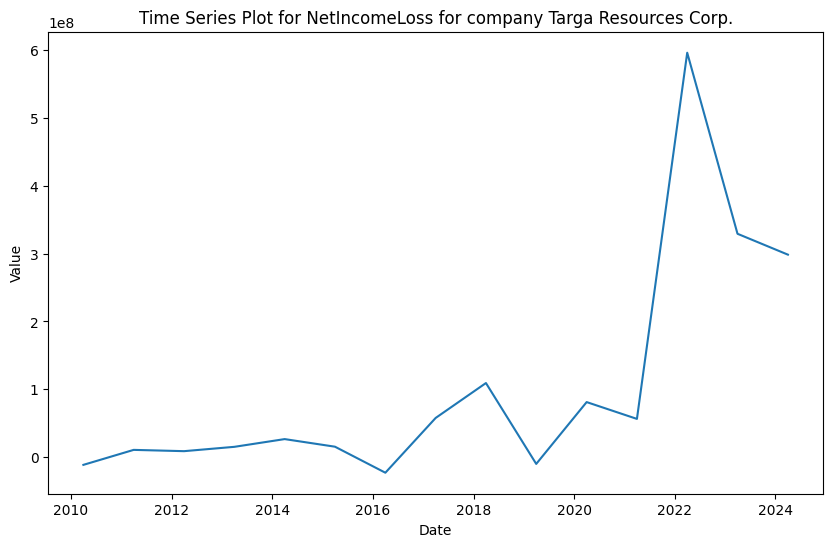

In [56]:

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(__data['start'], __data['val'])
ax.set_title(f'Time Series Plot for {feature} for company {company_name}')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
plt.show()


We can do this for all the features and companies combinations.